<a id='top'></a>
# Group Project
## Table of Contents

[Initial Imports](#initial)

[Correlation](#correlation)

[Correlation Heatmap](#heatmap)
    
[Data Spreads](#spreads)

### Results Section
[Regression Results](#results)

[Diversity Information By Country](#countries)

[Quota Countries with datapoint counts](#quota_countries)

[Table: Board diversity by country and year](#countries_tbl)

[Table: Board diversity by country and year for quota countries](#quota_country_div)

[Graphs for countries with quotas for publicly traded firms](#quota_graphs)

[Graph: Norway](#norway)

[Graph: Spain](#spain)

[Graph: France](#france)

[Graph: Israel](#israel)

[Graph: Belgium](#belgium)

<a id="initial"></a>
### `Initial imports and parameter setting`

In [363]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
import numpy as np
import statsmodels.api as sm
import statsmodels
from IPython.display import Image, display
from IPython.core.display import HTML 
import seaborn as sns

%matplotlib inline

print('Python version: ' + sys.version)
print('Pandas version: ' + pd.__version__)
print('Matplotlib version: ' + matplotlib.__version__)
#print('Scikit-Learn version: ' + sklearn.__version__)
print('Interpreter path: ' + sys.executable)
print('Statsmodel version: ' + statsmodels.__version__)
print('Seaborn version: ' + sns.__version__)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 1000)


Python version: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Pandas version: 0.23.0
Matplotlib version: 2.2.2
Interpreter path: C:\ProgramData\Anaconda3\python.exe
Statsmodel version: 0.9.0
Seaborn version: 0.8.1


### `Read in the data sheet`

In [364]:
df_main = pd.read_excel('CG_dataset_with_correl_region_err.xlsx', sheet_name='Data')

### `These are the numeric headers in the data file. These are used to run the correlation.`

In [365]:
numeric_hdrs = [
    'HAS_QUOTA', 'QUOTA_PCNT', 'QUOTA_PTF', 'QUOTA_SOE', 'QUOTA_PASSAGE_YEAR', 'QUOTA_COMPLIANCE_YEAR',
    'bsize', 'mbsize', 'sbsize', 'edirs', 'nedirs', 'idirs', '%brd_indp', 'bind', 'lstruc', 
    'ceooutside', 'nomcom', 'nomcomind', 'nomcomchart', 'nomcomsize', 'nomcommeet', 'femnom', 
    'meetatt', 'leaddir', 'boardmeet', 'mboardmeet', 'sboardmeet', 'femboard', 'femmboard',
    'femsboard', 'femceo', 'femchair', 'ceoage', 'ceoten', 'cgcomm', 'hrcomm', 'execcomm', 
    'investcomm', 'csrcomm', 'fincomm', 'execmmem', 'disclcoe', 'cgdiscl', 'audcomm', 'audcommind',
    'audcommmeet', 'finexp', 'audcommchart', 'audcommsize', 'femaud', 'audfees', 'aud2fees', 
    'taxfees', 'othfees', 'totfees', 'big4', 'compcomm', 'compcommind', 'compcommchar', 'compcommsize',
    'compcommmeet', 'femcomp', 'bown1st', 'bown1stper', 'mown1st', 'mown1stper', 'neown1st', 
    'neown1stper', 'indown1st', 'indown1stper', 'ceoown1st', 'ceoown1stper', 'eblock1st',
    'eblock1stper', 'iiown1st', 'iiown1stper', 'emown1st', 'emown1stper', 'misc1st', 'misc1stper',
    'state1st', 'state1stper', 'wheld1st', 'wheld1stper', 'largest1st', 'largest1stper', 'top51st',
    'top51stper', 'large1st', 'ff_sales', 'ff_oper_inc', 'assets', 'ff_assets_intl', 'ff_emp_num',
    'ff_rd_exp', 'R&D_INTENSITY', 'ff_roe', 'familyfirm', 'ffdef2', 'ffdef3', 'ffdef4', 'ffdef5',
    'ffdef6', 'ffdef7', 'ffdef8', 'ffdef9', 'ffdef10', 'ffdef11', 'ffdef12', 'ffdef13', 'ffdef14',
    'ffdef15', 'ffdef17', 'ffdef18', 'ffdef19', 'ffunlist', 'ffident', 'ffmgt', 'ceohired', 'ceofounder',
    'ceodescend', 'chairfounder', 'chairdescend', 'chairoutside', 'chairceohire', 'chairceofounder', 
    'chairceodescend', 'ffpercent', 'dualclass_ff', 'descendboard', 'desendmgt', 'founderboard', 
    'nffpercent', 'lonefounder', 'fflargest', 'fflargestmgt', 'mltpbh', 'wedge', 'FamilyBoardMembers'
]

# These are the focused headers referring to the categories we're interested in only.
interested_hdrs = [
    'bsize', 'mbsize', 'sbsize', 'HAS_QUOTA', 'QUOTA_PCNT', 'QUOTA_PTF', 'femnom', 'femboard', 'femmboard', 
    'femsboard', 'femceo', 'femchair', 'femaud', 'femcomp', 'FEM_DIV'
]

<a id='correlation'></a>
## Correlation matrix
[Return to Table of Contents](#top)

In [366]:
#df_numerics = df_main[numeric_hdrs].copy()
df_numerics = df_main[interested_hdrs].copy()

df_corr = df_numerics.corr(method='pearson')
# df_corr.to_excel('correlation.xlsx')
df_corr

,bsize,mbsize,sbsize,HAS_QUOTA,QUOTA_PCNT,QUOTA_PTF,femnom,femboard,femmboard,femsboard,femceo,femchair,femaud,femcomp,FEM_DIV
bsize,1.000000,NaN,NaN,0.009027,0.006032,0.032946,0.198321,0.302967,NaN,NaN,-0.000241,-0.005402,0.154593,0.146521,0.014553
mbsize,NaN,1.000000,0.254328,0.102510,0.102284,-0.130213,-0.015709,NaN,0.453862,0.064622,-0.025763,-0.008799,0.000390,-0.029612,NaN
sbsize,NaN,0.254328,1.000000,0.014306,0.013535,0.096514,0.025837,NaN,0.039748,0.508002,-0.036454,-0.034004,0.107084,0.056751,NaN
HAS_QUOTA,0.009027,0.102510,0.014306,1.000000,0.995527,0.811862,0.023057,0.207455,0.205893,0.315310,-0.017802,0.010039,0.106237,0.065261,0.239931
QUOTA_PCNT,0.006032,0.102284,0.013535,0.995527,1.000000,0.830013,0.023400,0.210661,0.205996,0.315449,-0.019805,0.010790,0.110445,0.068843,0.245888
QUOTA_PTF,0.032946,-0.130213,0.096514,0.811862,0.830013,1.000000,0.027712,0.197221,-0.030654,0.327394,-0.020662,0.010094,0.080964,0.058685,0.218238
femnom,0.198321,-0.015709,0.025837,0.023057,0.023400,0.027712,1.000000,0.616622,0.043163,0.448983,0.030911,0.066900,0.448170,0.637238,0.618079
femboard,0.302967,NaN,NaN,0.207455,0.210661,0.197221,0.616622,1.000000,NaN,NaN,0.076938,0.065997,0.627720,0.595000,0.904979
femmboard,NaN,0.453862,0.039748,0.205893,0.205996,-0.030654,0.043163,NaN,1.000000,0.108314,0.110042,0.013261,0.102943,0.057037,NaN
femsboard,NaN,0.064622,0.508002,0.315310,0.315449,0.327394,0.448983,NaN,0.108314,1.000000,-0.017215,0.057631,0.595444,0.530718,NaN


<a id='heatmap'></a>
### Pearson Correlation heatmap
[Return to Table of Contents](#top)

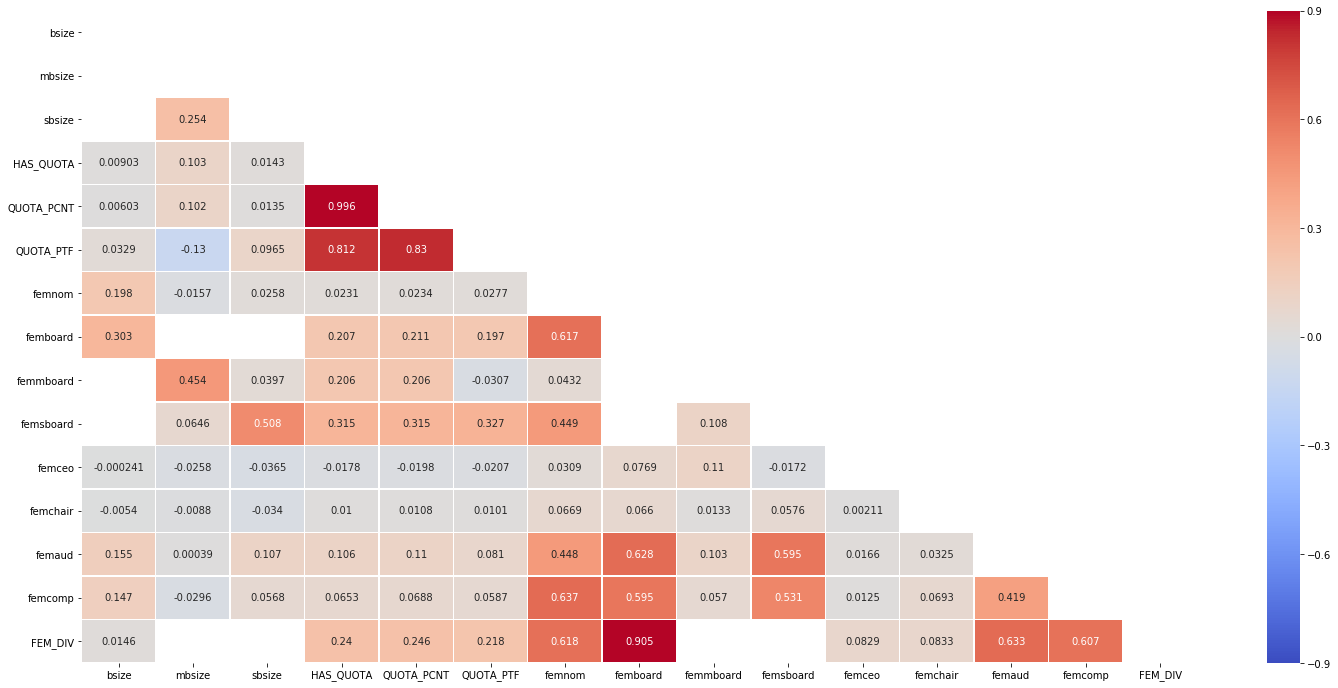

In [367]:
# Set a mask to avoid showing any NULL/NaN cells 
mask = df_corr.isnull()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (25, 12))
sns.heatmap(
    df_corr, 
    xticklabels=df_corr.columns,
    yticklabels=df_corr.columns,
    vmin=-.9, 
    vmax=.9,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".3g",
    linewidths=.5
)

<a id='spreads'></a>
## Data Spread Information
[Return to Table of Contents](#top)

### Data spread for Female Director(s) on nomination committee (femnom).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001855D737D68>]],
      dtype=object)

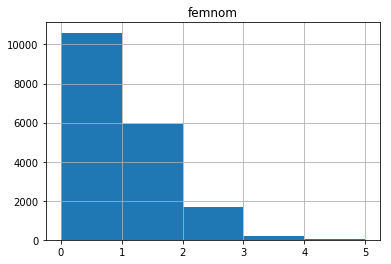

In [368]:
df_femnom = df_main[['femnom']].copy()
df_femnom['femnom'] = df_femnom['femnom']
df_femnom.hist(bins=5)

In [369]:
df_femnom['femnom'].value_counts()

0.0    10602
1.0     5946
2.0     1674
3.0      219
4.0       32
5.0        3
Name: femnom, dtype: int64

### Data spread for Female Director(s) on board (femboard).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001856AC85518>]],
      dtype=object)

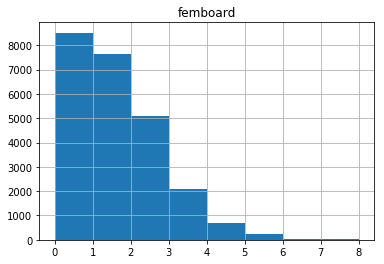

In [370]:
df_femboard = df_main[['femboard']].copy()
df_femboard['femboard'] = df_femboard['femboard']
df_femboard.hist(bins=8, range=(0,8))

In [371]:
df_femboard['femboard'].value_counts()

0.0    8517
1.0    7655
2.0    5088
3.0    2097
4.0     701
5.0     250
6.0      44
7.0      19
8.0       2
9.0       1
Name: femboard, dtype: int64

### Data spread for Female Director on Management Board (femmboard).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000185503B3A20>]],
      dtype=object)

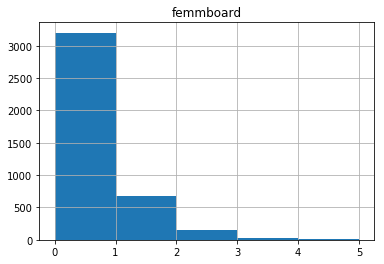

In [372]:
df_femmboard = df_main[['femmboard']].copy()
df_femmboard['femmboard'] = df_femmboard['femmboard']
df_femmboard.hist(bins=5, range=(0,5))

In [373]:
df_femmboard['femmboard'].value_counts()

0.0    3201
1.0     672
2.0     157
3.0      24
4.0       9
Name: femmboard, dtype: int64

### Data spread for Female Director on Supervisory Board (femsboard).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001856CE717F0>]],
      dtype=object)

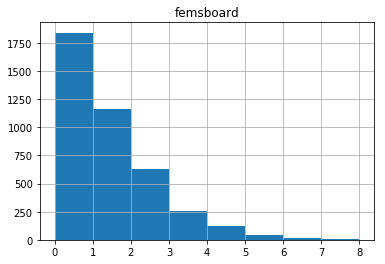

In [374]:
df_femsboard = df_main[['femsboard']].copy()
df_femsboard['femsboard'] = df_femsboard['femsboard']
df_femsboard.hist(bins=8)

In [375]:
df_femsboard['femsboard'].value_counts()

0.0    1841
1.0    1162
2.0     625
3.0     253
4.0     119
5.0      43
6.0      12
7.0       6
8.0       2
Name: femsboard, dtype: int64

### Data spread for Woman CEO (femceo).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001856FFBE198>]],
      dtype=object)

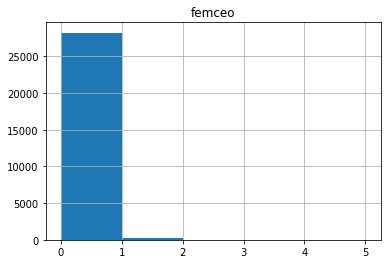

In [376]:
df_femceo = df_main[['femceo']].copy()
df_femceo['femceo'] = df_femceo['femceo']
df_femceo.hist(bins=5, range=(0,5))

In [377]:
df_femceo['femceo'].value_counts()

0    28221
1      216
Name: femceo, dtype: int64

### Data spread for Woman Chairperson (femchair).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000185712DF9B0>]],
      dtype=object)

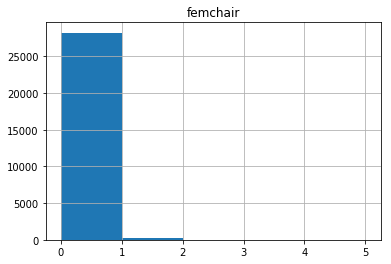

In [378]:
df_femchair = df_main[['femchair']].copy()
df_femchair['femchair'] = df_femchair['femchair']
df_femchair.hist(bins=5, range=(0,5))

In [379]:
df_femchair['femchair'].value_counts()

0    28233
1      203
2        1
Name: femchair, dtype: int64

### Data spread for Female Director(s) on audit committee (femaud).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001856D91E710>]],
      dtype=object)

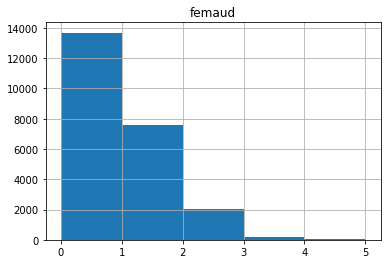

In [380]:
df_femaud = df_main[['femaud']].copy()
df_femaud['femaud'] = df_femaud['femaud']
df_femaud.hist(bins=5)

In [381]:
df_femaud['femaud'].value_counts()

0.0    13687
1.0     7572
2.0     2042
3.0      205
4.0       38
5.0        6
Name: femaud, dtype: int64

### Data spread for Female Director(s) on remuneration committee (femcomp).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001856D96FA20>]],
      dtype=object)

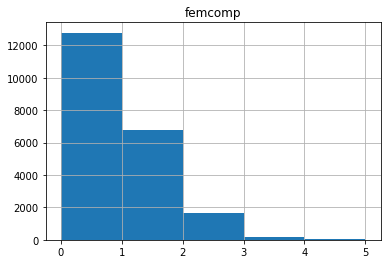

In [382]:
df_femcomp = df_main[['femcomp']].copy()
df_femcomp['femcomp'] = df_femcomp['femcomp']
df_femcomp.hist(bins=5)

In [383]:
df_femcomp['femcomp'].value_counts()

0.0    12773
1.0     6758
2.0     1674
3.0      191
4.0       21
5.0        3
Name: femcomp, dtype: int64

<a id='results'></a>
## Results Section
[Return to Table of Contents](#top)

## Notable: There appears to be a relationship between having women on the board and the board size. (One-Tier boards)

### In the regression below, we see an R-squared of 0.546 with a P-value of ~0.0 indicating a better-than-not likelihood that the size of the board is increased when a woman is added to the board. This seems to show a trend of adding a woman to the board as an n+1 (where n is the original board size) rather than maintaining the same n via replacing an existing member.

####  `Correlation: ~.303; R-Squared: 0.546; P-value: ~0.0; Observations: 24,374`

Trendline Equation: y=0.773802x+(8.414368)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bsize   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                 2.931e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        03:16:53   Log-Likelihood:                -80572.
No. Observations:               24374   AIC:                         1.611e+05
Df Residuals:                   24373   BIC:                         1.612e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
femboard       4.3616      0.025    171.207      0.000       4.312       4.412
==============================================================================
Omnibus:                      656.262   Durbin-Watson:                   0.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1184.313
Skew:                          -0.221   Prob(JB):                    6.76e-258
Kurtosis:                       3.985   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

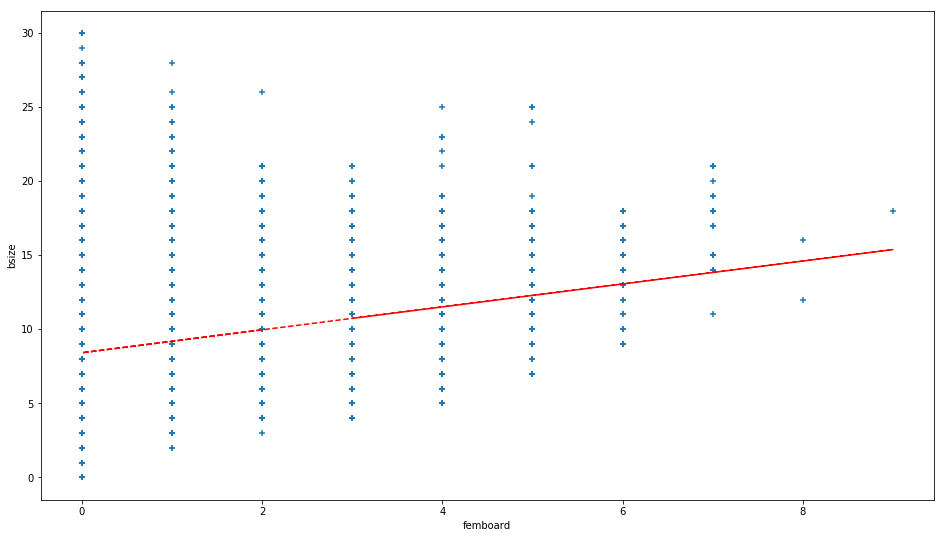

In [409]:
df_board_w_fem = df_main[['bsize', 'femboard']].copy()
df_board_w_fem['bsize'] = df_board_w_fem['bsize']
df_board_w_fem['femboard'] = df_board_w_fem['femboard']

df_board_w_fem = df_board_w_fem.dropna()

x = df_board_w_fem['femboard']
y = df_board_w_fem['bsize']

plt.figure(figsize = (16, 9))
plt.scatter(df_board_w_fem['femboard'], df_board_w_fem['bsize'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("bsize")
plt.xlabel("femboard")

model = sm.OLS(y, x).fit()

model.summary()

## Notable: There appears to be little to no relationship between having a quota for gender diversity on a board and the actual amount of women on the board. (One-Tier boards).

### Countries were coded if they had a quota (1) or not (0) and when the quota came into place.

#### `Correlation: ~0.207; R-Squared: 0.151; P-value: ~0.0; Observations: 24,374`

Trendline Equation: y=0.731456x+(1.080660)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               femboard   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     4340.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        03:16:39   Log-Likelihood:                -44924.
No. Observations:               24374   AIC:                         8.985e+04
Df Residuals:                   24373   BIC:                         8.986e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HAS_QUOTA      1.8121      0.028     65.876      0.000       1.758       1.866
==============================================================================
Omnibus:                     1906.920   Durbin-Watson:                   0.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2726.170
Skew:                           0.647   Prob(JB):                         0.00
Kurtosis:                       4.005   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

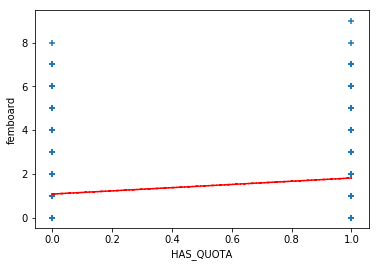

In [407]:
df_quota_w_fem = df_main[['HAS_QUOTA', 'femboard']].copy()
df_quota_w_fem['HAS_QUOTA'] = df_quota_w_fem['HAS_QUOTA']
df_quota_w_fem['femboard'] = df_quota_w_fem['femboard']

df_quota_w_fem = df_quota_w_fem.dropna()

x = df_quota_w_fem['HAS_QUOTA']
y = df_quota_w_fem['femboard']


plt.scatter(df_quota_w_fem['HAS_QUOTA'], df_quota_w_fem['femboard'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("femboard")
plt.xlabel("HAS_QUOTA")

model = sm.OLS(y, x).fit()

model.summary()

## Notable: There appears to be little to no relationship between having a quota for gender diversity for PTFs on a board and the actual amount of women on the board. (One-Tier boards).

### Countries were coded if they had a quota for PTFs (1) or not (0) and when the quota came into place.

#### `Correlation: ~0.197; R-Squared: 0.119; P-value: ~0.0; Observations: 24,374`

Trendline Equation: y=0.808556x+(1.100618)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               femboard   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     3294.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        03:11:40   Log-Likelihood:                -45376.
No. Observations:               24374   AIC:                         9.075e+04
Df Residuals:                   24373   BIC:                         9.076e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
QUOTA_PTF      1.9092      0.033     57.397      0.000       1.844       1.974
==============================================================================
Omnibus:                     1964.460   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2810.756
Skew:                           0.662   Prob(JB):                         0.00
Kurtosis:                       4.009   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

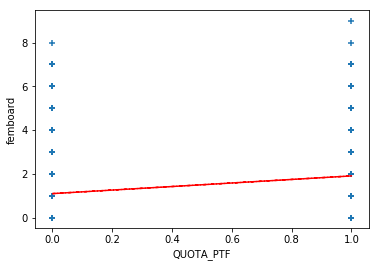

In [386]:
df_quota_w_fem = df_main[['QUOTA_PTF', 'femboard']].copy()
df_quota_w_fem['QUOTA_PTF'] = df_quota_w_fem['QUOTA_PTF']
df_quota_w_fem['femboard'] = df_quota_w_fem['femboard']

df_quota_w_fem = df_quota_w_fem.dropna()

x = df_quota_w_fem['QUOTA_PTF']
y = df_quota_w_fem['femboard']

plt.scatter(df_quota_w_fem['QUOTA_PTF'], df_quota_w_fem['femboard'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("femboard")
plt.xlabel("QUOTA_PTF")

model = sm.OLS(y, x).fit()

model.summary()

## There appears to be no relationship between having a quota for gender diversity on boards and the actual amount of women on the management board. (Specifically relates to countries with two-tier board structures).

#### `Correlation: ~0.206; R-Squared: 0.095; P-value: ~0.0; Observations: 4,063`

Trendline Equation: y=0.406122x+(0.230476)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              femmboard   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     425.0
Date:                Mon, 25 Feb 2019   Prob (F-statistic):           6.79e-90
Time:                        03:11:40   Log-Likelihood:                -3744.6
No. Observations:                4063   AIC:                             7491.
Df Residuals:                    4062   BIC:                             7497.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HAS_QUOTA      0.6366      0.031     20.616      0.000       0.576       0.697
==============================================================================
Omnibus:                     1981.566   Durbin-Watson:                   0.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12663.771
Skew:                           2.270   Prob(JB):                         0.00
Kurtosis:                      10.361   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

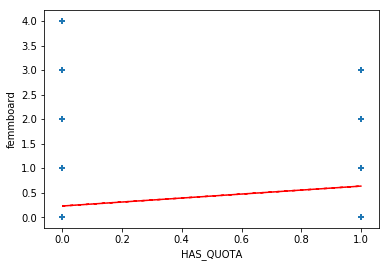

In [387]:
df_quota_w_femm = df_main[['HAS_QUOTA', 'femmboard']].copy()
df_quota_w_femm['HAS_QUOTA'] = df_quota_w_femm['HAS_QUOTA']
df_quota_w_femm['femmboard'] = df_quota_w_femm['femmboard']

df_quota_w_femm = df_quota_w_femm.dropna()

x = df_quota_w_femm['HAS_QUOTA']
y = df_quota_w_femm['femmboard']

plt.scatter(df_quota_w_femm['HAS_QUOTA'], df_quota_w_femm['femmboard'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("femmboard")
plt.xlabel("HAS_QUOTA")

model = sm.OLS(y, x).fit()

model.summary()

## There appears to be little to no relationship between having a quota for gender diversity on boards and the actual amount of women on the supervisory board. (Specifically relates to countries with two-tier board structures).

#### `Correlation: 0.315; R-Squared: 0.183; P-value ~0.0; Observations: 4,063`

Trendline Equation: y=1.287315x+(0.859592)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              femsboard   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     909.9
Date:                Mon, 25 Feb 2019   Prob (F-statistic):          1.51e-180
Time:                        03:11:40   Log-Likelihood:                -7137.4
No. Observations:                4063   AIC:                         1.428e+04
Df Residuals:                    4062   BIC:                         1.428e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HAS_QUOTA      2.1469      0.071     30.165      0.000       2.007       2.286
==============================================================================
Omnibus:                      945.433   Durbin-Watson:                   0.370
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2389.535
Skew:                           1.261   Prob(JB):                         0.00
Kurtosis:                       5.785   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

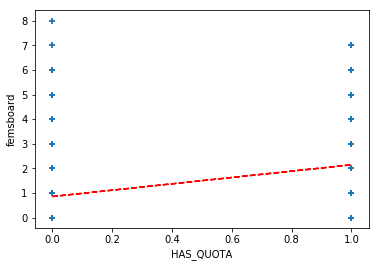

In [388]:
df_quota_w_fems = df_main[['HAS_QUOTA', 'femsboard']].copy()
df_quota_w_fems['HAS_QUOTA'] = df_quota_w_fems['HAS_QUOTA']
df_quota_w_fems['femsboard'] = df_quota_w_fems['femsboard']

df_quota_w_fems = df_quota_w_fems.dropna()

x = df_quota_w_fems['HAS_QUOTA']
y = df_quota_w_fems['femsboard']

plt.scatter(df_quota_w_fems['HAS_QUOTA'], df_quota_w_fems['femsboard'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("femsboard")
plt.xlabel("HAS_QUOTA")

model = sm.OLS(y, x).fit()

model.summary()

## Notable: There appears to be little to no relationship between having a quota for gender diversity for Publicly Traded Firms (PTFs) on a board and the actual amount of women on the board.

#### `Correlation: ~0.197; R-Squared: 0.119; P-value ~0.0; Observations: 24,374`

Trendline Equation: y=0.808556x+(1.100618)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               femboard   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     3294.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        03:11:40   Log-Likelihood:                -45376.
No. Observations:               24374   AIC:                         9.075e+04
Df Residuals:                   24373   BIC:                         9.076e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
QUOTA_PTF      1.9092      0.033     57.397      0.000       1.844       1.974
==============================================================================
Omnibus:                     1964.460   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2810.756
Skew:                           0.662   Prob(JB):                         0.00
Kurtosis:                       4.009   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

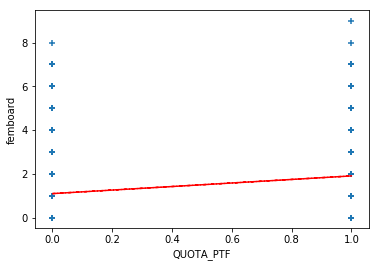

In [389]:
df_quota_w_fem = df_main[['QUOTA_PTF', 'femboard']].copy()
df_quota_w_fem['QUOTA_PTF'] = df_quota_w_fem['QUOTA_PTF']
df_quota_w_fem['femboard'] = df_quota_w_fem['femboard']

df_quota_w_fem = df_quota_w_fem.dropna()

x = df_quota_w_fem['QUOTA_PTF']
y = df_quota_w_fem['femboard']

plt.scatter(df_quota_w_fem['QUOTA_PTF'], df_quota_w_fem['femboard'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("femboard")
plt.xlabel("QUOTA_PTF")

model = sm.OLS(y, x).fit()

model.summary()

## There appears to be no relationship between having a quota for gender diversity for Publicly Traded Firms (PTFs) on a board and the amount of women on the management board. (Specifically relates to countries with two-tier board structures).

#### `Correlation: ~-0.031; R-Squared: 0.004; P-value ~0.0; Observations: 4,063`

Trendline Equation: y=-0.082337x+(0.273292)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              femmboard   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     17.83
Date:                Mon, 25 Feb 2019   Prob (F-statistic):           2.46e-05
Time:                        03:11:41   Log-Likelihood:                -3937.8
No. Observations:                4063   AIC:                             7878.
Df Residuals:                    4062   BIC:                             7884.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
QUOTA_PTF      0.1910      0.045      4.223      0.000       0.102       0.280
==============================================================================
Omnibus:                     2101.931   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12856.925
Skew:                           2.471   Prob(JB):                         0.00
Kurtosis:                      10.178   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

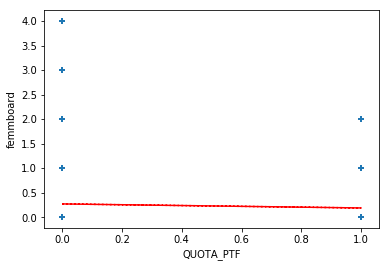

In [390]:
df_quota_w_femm = df_main[['QUOTA_PTF', 'femmboard']].copy()
df_quota_w_femm['QUOTA_PTF'] = df_quota_w_femm['QUOTA_PTF']
df_quota_w_femm['femmboard'] = df_quota_w_femm['femmboard']

df_quota_w_femm = df_quota_w_femm.dropna()

x = df_quota_w_femm['QUOTA_PTF']
y = df_quota_w_femm['femmboard']

plt.scatter(df_quota_w_femm['QUOTA_PTF'], df_quota_w_femm['femmboard'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("femmboard")
plt.xlabel("QUOTA_PTF")

model = sm.OLS(y, x).fit()

model.summary()

## There appears to be little to no relationship between having a quota for gender diversity for Publicly Traded Firms (PTFs) and the amount of women on the supervisory board. (Specifically relates to countries with two-tier board structures).

#### `Correlation: 0.327; R-Squared: 0.150; P-value ~0.0; Observations: 4,063`

Trendline Equation: y=1.820193x+(0.893375)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              femsboard   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     716.6
Date:                Mon, 25 Feb 2019   Prob (F-statistic):          1.62e-145
Time:                        03:11:41   Log-Likelihood:                -7217.9
No. Observations:                4063   AIC:                         1.444e+04
Df Residuals:                    4062   BIC:                         1.444e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
QUOTA_PTF      2.7136      0.101     26.768      0.000       2.515       2.912
==============================================================================
Omnibus:                      967.826   Durbin-Watson:                   0.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2302.691
Skew:                           1.319   Prob(JB):                         0.00
Kurtosis:                       5.578   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

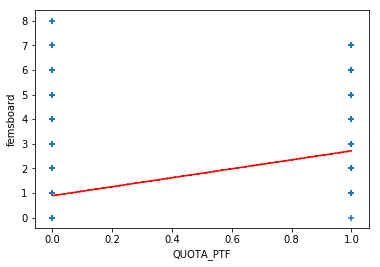

In [391]:
df_quota_w_fems = df_main[['QUOTA_PTF', 'femsboard']].copy()
df_quota_w_fems['QUOTA_PTF'] = df_quota_w_fems['QUOTA_PTF']
df_quota_w_fems['femsboard'] = df_quota_w_fems['femsboard']

df_quota_w_fems = df_quota_w_fems.dropna()

x = df_quota_w_fems['QUOTA_PTF']
y = df_quota_w_fems['femsboard']

plt.scatter(df_quota_w_fems['QUOTA_PTF'], df_quota_w_fems['femsboard'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("femsboard")
plt.xlabel("QUOTA_PTF")

model = sm.OLS(y, x).fit()

model.summary()

## Notable: There appears to be a relationship between those countries that do have quotas and the percentage of women on the board that the quota requires.

### In countries which have a quota, it appears that the higher the quota, the more women are on the boards. This may indicate that if there is a quota, companies only do what they can to fulfil it and nothing more.

#### `R-Squared: 0.630; P-value ~0.0; Observations: 3,087`

Trendline Equation: y=3.929819x+(0.309962)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               femboard   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     5252.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        03:11:41   Log-Likelihood:                -5403.7
No. Observations:                3087   AIC:                         1.081e+04
Df Residuals:                    3086   BIC:                         1.082e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
QUOTA_PCNT     4.7337      0.065     72.469      0.000       4.606       4.862
==============================================================================
Omnibus:                      239.994   Durbin-Watson:                   0.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.936
Skew:                           0.715   Prob(JB):                     7.41e-66
Kurtosis:                       3.533   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

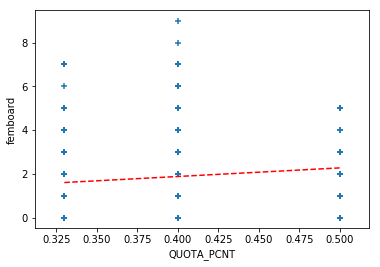

In [392]:
df_quota_w_fem = df_main[['HAS_QUOTA', 'QUOTA_PCNT', 'femboard']].copy()
df_quota_w_fem = df_quota_w_fem[df_quota_w_fem['HAS_QUOTA'] == 1]

df_quota_w_fem['HAS_QUOTA'] = df_quota_w_fem['HAS_QUOTA']
df_quota_w_fem['femboard'] = df_quota_w_fem['femboard']

df_quota_w_fem = df_quota_w_fem.dropna()

x = df_quota_w_fem['QUOTA_PCNT']
y = df_quota_w_fem['femboard']

plt.scatter(df_quota_w_fem['QUOTA_PCNT'], df_quota_w_fem['femboard'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("femboard")
plt.xlabel("QUOTA_PCNT")

model = sm.OLS(y, x).fit()

model.summary()

## Notable: There appears to be a relationship between those countries that do have quotas for PTFs and the percentage of women on the board of a PTF that the quota requires.

### In countries which have a quota for PTFs, it appears that the higher the quota, the more women are on the boards. This may indicate that if there is a quota for a PTF, companies only do what they can to fulfil it and nothing more.

#### `R-Squared: 0.627; P-value ~0.0; Observations: 2,191`

Trendline Equation: y=5.107283x+(-0.096046)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               femboard   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     3674.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        03:11:42   Log-Likelihood:                -3966.4
No. Observations:                2191   AIC:                             7935.
Df Residuals:                    2190   BIC:                             7940.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
QUOTA_PCNT     4.8642      0.080     60.613      0.000       4.707       5.022
==============================================================================
Omnibus:                      154.911   Durbin-Watson:                   0.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.666
Skew:                           0.688   Prob(JB):                     1.77e-41
Kurtosis:                       3.403   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

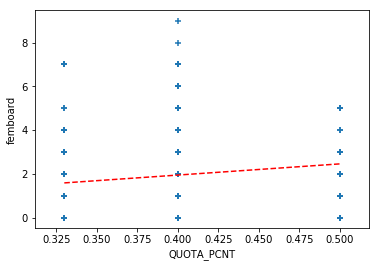

In [393]:
df_quota_w_fem = df_main[['QUOTA_PTF', 'QUOTA_PCNT', 'femboard']].copy()
df_quota_w_fem = df_quota_w_fem[df_quota_w_fem['QUOTA_PTF'] == 1]

df_quota_w_fem['QUOTA_PTF'] = df_quota_w_fem['QUOTA_PTF']
df_quota_w_fem['femboard'] = df_quota_w_fem['femboard']

df_quota_w_fem = df_quota_w_fem.dropna()

x = df_quota_w_fem['QUOTA_PCNT']
y = df_quota_w_fem['femboard']

plt.scatter(df_quota_w_fem['QUOTA_PCNT'], df_quota_w_fem['femboard'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("femboard")
plt.xlabel("QUOTA_PCNT")

model = sm.OLS(y, x).fit()

model.summary()

## There appears a small but less significant relationship between those countries that do have quotas and the percentage of women on the management board that the quota requires. (Specifically relates to countries with two-tier board structures).

#### `R-Squared: 0.392; P-value ~0.0; Observations: 535`

Trendline Equation: y=1.971726x+(-0.150670)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              femmboard   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     249.8
Date:                Mon, 25 Feb 2019   Prob (F-statistic):           8.98e-44
Time:                        03:11:42   Log-Likelihood:                -460.32
No. Observations:                 388   AIC:                             922.6
Df Residuals:                     387   BIC:                             926.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
QUOTA_PCNT     1.5945      0.101     15.806      0.000       1.396       1.793
==============================================================================
Omnibus:                       50.531   Durbin-Watson:                   0.460
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.816
Skew:                           1.019   Prob(JB):                     1.88e-15
Kurtosis:                       3.195   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

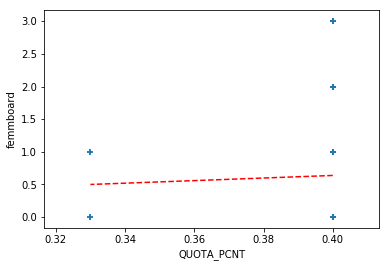

In [394]:
df_quota_w_femm = df_main[['HAS_QUOTA', 'QUOTA_PCNT', 'femmboard']].copy()
df_quota_w_femm = df_quota_w_femm[df_quota_w_femm['HAS_QUOTA'] == 1]

df_quota_w_femm['HAS_QUOTA'] = df_quota_w_femm['HAS_QUOTA']
df_quota_w_femm['femmboard'] = df_quota_w_femm['femmboard']

df_quota_w_femm = df_quota_w_femm.dropna()

x = df_quota_w_femm['QUOTA_PCNT']
y = df_quota_w_femm['femmboard']

plt.scatter(df_quota_w_femm['QUOTA_PCNT'], df_quota_w_femm['femmboard'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("femmboard")
plt.xlabel("QUOTA_PCNT")

model = sm.OLS(y, x).fit()

model.summary()

## Notable: There appears to be a significant relationship between those countries that do have quotas and the percentage of women on the supervisory board that the quota requires. (Specifically relates to countries with two-tier board structures).

#### `R-Squared: 0.702; P-value ~0.0; Observations: 535`

Trendline Equation: y=5.729167x+(-0.140625)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              femsboard   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     913.4
Date:                Mon, 25 Feb 2019   Prob (F-statistic):          6.80e-104
Time:                        03:11:43   Log-Likelihood:                -680.46
No. Observations:                 388   AIC:                             1363.
Df Residuals:                     387   BIC:                             1367.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
QUOTA_PCNT     5.3771      0.178     30.222      0.000       5.027       5.727
==============================================================================
Omnibus:                       43.963   Durbin-Watson:                   0.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.270
Skew:                           0.833   Prob(JB):                     3.66e-13
Kurtosis:                       3.877   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

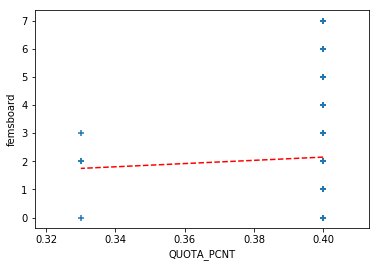

In [395]:
df_quota_w_fems = df_main[['HAS_QUOTA', 'QUOTA_PCNT', 'femsboard']].copy()
df_quota_w_fems = df_quota_w_fems[df_quota_w_fems['HAS_QUOTA'] == 1]

df_quota_w_fems['HAS_QUOTA'] = df_quota_w_fems['HAS_QUOTA']
df_quota_w_fems['femsboard'] = df_quota_w_fems['femsboard']

df_quota_w_fems = df_quota_w_fems.dropna()

x = df_quota_w_fems['QUOTA_PCNT']
y = df_quota_w_fems['femsboard']

plt.scatter(df_quota_w_fems['QUOTA_PCNT'], df_quota_w_fems['femsboard'], marker="+")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
print("Trendline Equation: y={0:.6f}x+({1:.6f})".format(z[0],z[1]))
plt.ylabel("femsboard")
plt.xlabel("QUOTA_PCNT")

model = sm.OLS(y, x).fit()

model.summary()

<a id='countries'></a>
# Diversity Information By Country
#### Assessments for: NOR; ESP; FIN; CAN; ISR; FRA; ITA; BEL
[Return to Table of Contents](#top)


<a id='quota_countries'></a>
### Quota countries with datapoint counts
|ISO-3|Datapoint Count|
|------|------|
|NOR|629|
|ESP|605|
|FIN|529|
|CAN|1180|
|ISR|63|
|FRA|1340|
|ITA|1014|
|BEL|446|


<a id='countries_tbl'></a>
### All countries by year with percentage of female board diversity (FEM_DIV: femboard / bsize)
[Return to Table of Contents](#top)

In [396]:
df_fem_desc = df_main[['country', 'year', 'HAS_QUOTA', 'QUOTA_PTF', 'QUOTA_PCNT', 'FEM_DIV']]
df_fem_desc_grouped = df_fem_desc.groupby(['country', 'year', 'HAS_QUOTA', 'QUOTA_PTF', 'QUOTA_PCNT'])['FEM_DIV'].mean().reset_index()
#df_fem_desc_grouped.to_excel('year_over_year.xlsx', index=False)
df_fem_desc_grouped

,country,year,HAS_QUOTA,QUOTA_PTF,QUOTA_PCNT,FEM_DIV
0,AUS,2007,0,0,0.00,0.074877
1,AUS,2008,0,0,0.00,0.080014
2,AUS,2009,0,0,0.00,0.079301
3,AUS,2010,0,0,0.00,0.097514
4,AUS,2011,0,0,0.00,0.100655
5,AUS,2012,0,0,0.00,0.117550
6,AUS,2013,0,0,0.00,0.123762
7,AUS,2014,0,0,0.00,0.143475
8,AUS,2015,0,0,0.00,0.156732
9,AUT,2007,0,0,0.00,NaN


<a id='quota_country_div'></a>
### Table of diversity for countries with quotas
[Return to Table of Contents](#top)

In [397]:
quota_countries = ["NOR", "ESP", "FIN", "CAN", "ISR", "FRA", "ITA", "BEL"]

df_fem_desc_grouped_quotas = df_fem_desc_grouped.loc[df_fem_desc_grouped['country'].isin(quota_countries)]

df_fem_desc_grouped_quotas

,country,year,HAS_QUOTA,QUOTA_PTF,QUOTA_PCNT,FEM_DIV
18,BEL,2007,0,0,0.00,0.091718
19,BEL,2008,0,0,0.00,0.078240
20,BEL,2009,0,0,0.00,0.096633
21,BEL,2010,0,0,0.00,0.109973
22,BEL,2011,1,1,0.33,0.094582
23,BEL,2012,1,1,0.33,0.121396
24,BEL,2013,1,1,0.33,0.148643
25,BEL,2014,1,1,0.33,0.151502
26,BEL,2015,1,1,0.33,0.175830
36,CAN,2007,0,0,0.00,0.130336


<a id='quota_graphs'></a>
## Graphs for firms with quotas for publicly traded firms
### Red line indicates year the quota legislation was passed

<a id='norway'></a>
### Norway
#### Legislation passed in 2003
[Return to Table of Contents](#top)

,country,year,HAS_QUOTA,QUOTA_PTF,QUOTA_PCNT,FEM_DIV
232,NOR,2007,1,1,0.4,0.349664
233,NOR,2008,1,1,0.4,0.356773
234,NOR,2009,1,1,0.4,0.350089
235,NOR,2010,1,1,0.4,0.325626
236,NOR,2011,1,1,0.4,0.337901
237,NOR,2012,1,1,0.4,0.328221
238,NOR,2013,1,1,0.4,0.329047
239,NOR,2014,1,1,0.4,0.326805
240,NOR,2015,1,1,0.4,0.334695


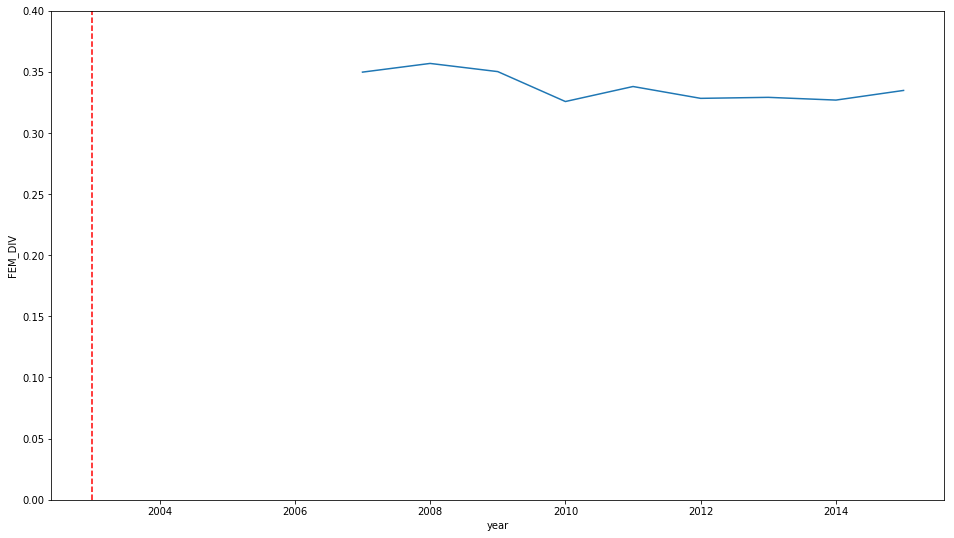

In [419]:
df_ctry = df_fem_desc_grouped.loc[df_fem_desc_grouped['country'] == "NOR"]
x = df_ctry['year']
y = df_ctry['FEM_DIV']

y_min = 0
y_max = .4
quota_passage_year = 2003

plt.figure(figsize = (16, 9))
plt.plot(x,y)
plt.plot([quota_passage_year,quota_passage_year], [y_min,y_max], 'r--')
axes = plt.gca()
axes.set_ylim([y_min,y_max])
plt.ylabel("FEM_DIV")
plt.xlabel("year")

df_ctry

<a id='spain'></a>
### Spain
#### Legislation passed in 2007
[Return to Table of Contents](#top)

,country,year,HAS_QUOTA,QUOTA_PTF,QUOTA_PCNT,FEM_DIV
90,ESP,2007,1,1,0.4,0.053356
91,ESP,2008,1,1,0.4,0.068449
92,ESP,2009,1,1,0.4,0.085717
93,ESP,2010,1,1,0.4,0.093963
94,ESP,2011,1,1,0.4,0.102554
95,ESP,2012,1,1,0.4,0.092674
96,ESP,2013,1,1,0.4,0.098817
97,ESP,2014,1,1,0.4,0.115460
98,ESP,2015,1,1,0.4,0.137167


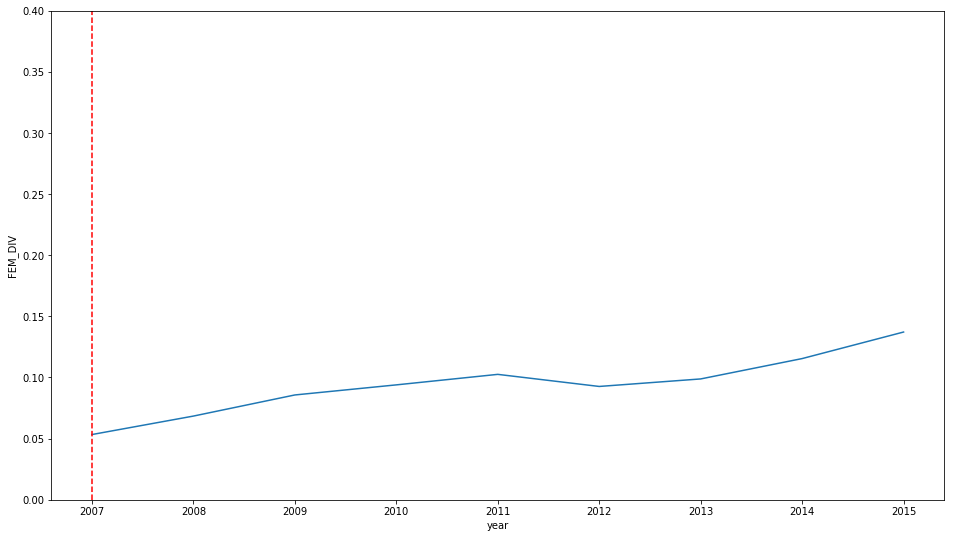

In [418]:
df_ctry = df_fem_desc_grouped.loc[df_fem_desc_grouped['country'] == "ESP"]
x = df_ctry['year']
y = df_ctry['FEM_DIV']

y_min = 0
y_max = .4
quota_passage_year = 2007

plt.figure(figsize = (16, 9))
plt.plot(x,y)
plt.plot([quota_passage_year,quota_passage_year], [y_min,y_max], 'r--')
axes = plt.gca()
axes.set_ylim([y_min,y_max])
plt.ylabel("FEM_DIV")
plt.xlabel("year")

df_ctry

<a id='france'></a>
### France
#### Legislation passed in 2011
[Return to Table of Contents](#top)

,country,year,HAS_QUOTA,QUOTA_PTF,QUOTA_PCNT,FEM_DIV
108,FRA,2007,0,0,0.0,0.089856
109,FRA,2008,0,0,0.0,0.093146
110,FRA,2009,0,0,0.0,0.104937
111,FRA,2010,0,0,0.0,0.125872
112,FRA,2011,1,1,0.4,0.173873
113,FRA,2012,1,1,0.4,0.211028
114,FRA,2013,1,1,0.4,0.240414
115,FRA,2014,1,1,0.4,0.283745
116,FRA,2015,1,1,0.4,0.302779


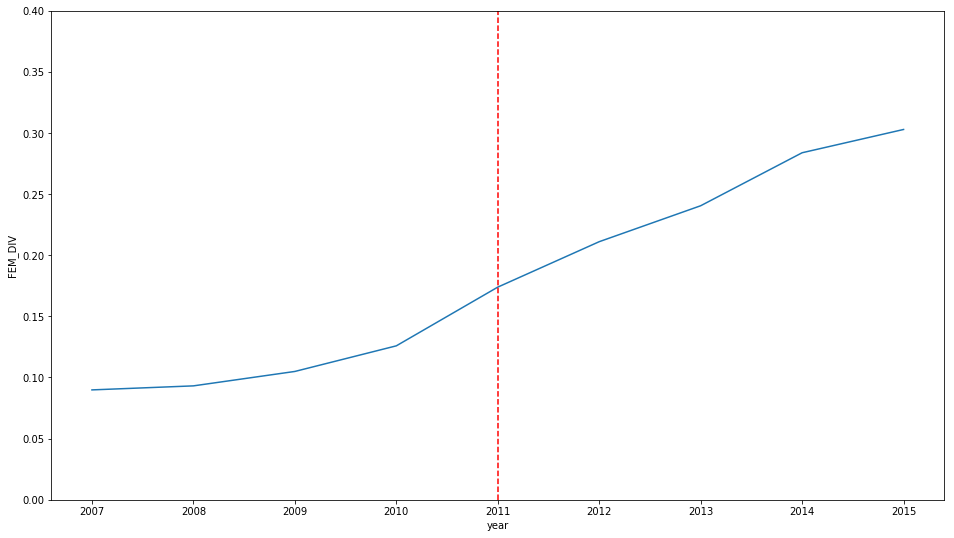

In [417]:
df_ctry = df_fem_desc_grouped.loc[df_fem_desc_grouped['country'] == "FRA"]
x = df_ctry['year']
y = df_ctry['FEM_DIV']

y_min = 0
y_max = .4
quota_passage_year = 2011

plt.figure(figsize = (16, 9))
plt.plot(x,y)
plt.plot([quota_passage_year,quota_passage_year], [y_min,y_max], 'r--')
axes = plt.gca()
axes.set_ylim([y_min,y_max])
plt.ylabel("FEM_DIV")
plt.xlabel("year")

df_ctry

<a id='israel'></a>
### Israel
#### Legislation passed in 1999
#### Note: No compliance date or quota percentage was given. It was specified that one board seat went to a woman.
[Return to Table of Contents](#top)

,country,year,HAS_QUOTA,QUOTA_PTF,QUOTA_PCNT,FEM_DIV
183,ISR,2011,1,1,0.5,0.128837
184,ISR,2012,1,1,0.5,0.146349
185,ISR,2013,1,1,0.5,0.169790
186,ISR,2014,1,1,0.5,0.187448
187,ISR,2015,1,1,0.5,0.233399


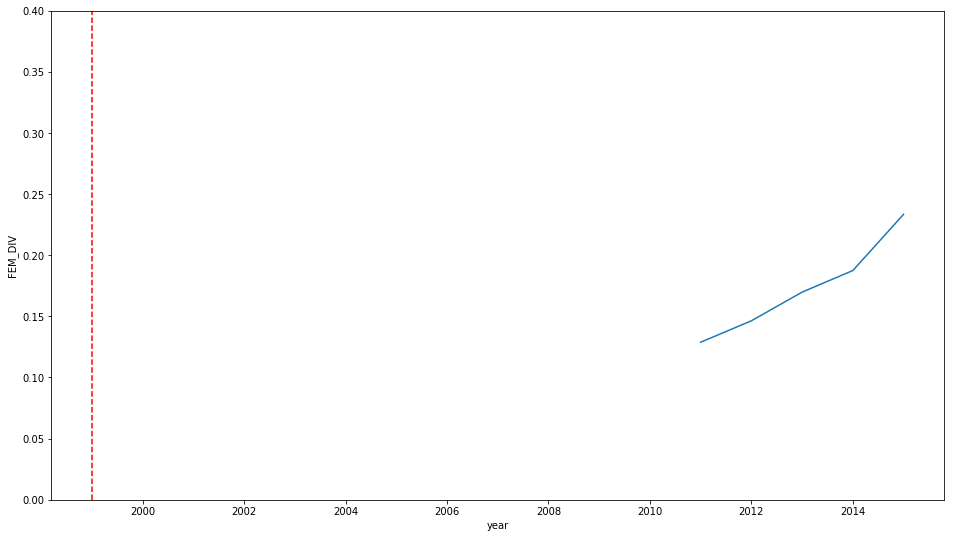

In [416]:
df_ctry = df_fem_desc_grouped.loc[df_fem_desc_grouped['country'] == "ISR"]
x = df_ctry['year']
y = df_ctry['FEM_DIV']

y_min = 0
y_max = .4
quota_passage_year = 1999

plt.figure(figsize = (16, 9))
plt.plot(x,y)
plt.plot([quota_passage_year,quota_passage_year], [y_min,y_max], 'r--')
axes = plt.gca()
axes.set_ylim([y_min,y_max])
plt.ylabel("FEM_DIV")
plt.xlabel("year")

df_ctry


<a id='belgium'></a>
### Belgium
#### Legislation passed in 2011
[Return to Table of Contents](#top)

,country,year,HAS_QUOTA,QUOTA_PTF,QUOTA_PCNT,FEM_DIV
18,BEL,2007,0,0,0.00,0.091718
19,BEL,2008,0,0,0.00,0.078240
20,BEL,2009,0,0,0.00,0.096633
21,BEL,2010,0,0,0.00,0.109973
22,BEL,2011,1,1,0.33,0.094582
23,BEL,2012,1,1,0.33,0.121396
24,BEL,2013,1,1,0.33,0.148643
25,BEL,2014,1,1,0.33,0.151502
26,BEL,2015,1,1,0.33,0.175830


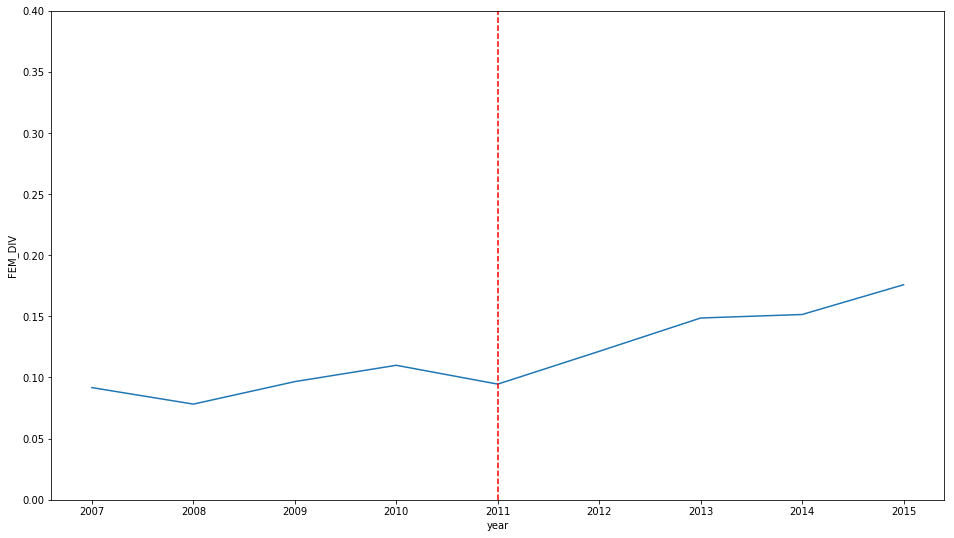

In [415]:
df_ctry = df_fem_desc_grouped.loc[df_fem_desc_grouped['country'] == "BEL"]
x = df_ctry['year']
y = df_ctry['FEM_DIV']

y_min = 0
y_max = .4
quota_passage_year = 2011

plt.figure(figsize = (16, 9))
plt.plot(x,y)
plt.plot([quota_passage_year,quota_passage_year], [y_min,y_max], 'r--')
axes = plt.gca()
axes.set_ylim([y_min,y_max])
plt.ylabel("FEM_DIV")
plt.xlabel("year")

df_ctry

[Return to Table of Contents](#top)